In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(color_codes=True)

In [4]:
df=pd.read_csv('churn_modelling[1].csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.select_dtypes(include='object').nunique()

Surname      2932
Geography       3
Gender          2
dtype: int64

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.shape

(10000, 14)

In [10]:
#Remove Surname Column as it is not going to helpful for modelling building

df.drop(columns='Surname',inplace=True)
df.head()

,RowNumber,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
#Remove RowNumber as it doesnt be part of data modelling

df.drop(columns='RowNumber',inplace=True)
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Exploratory Data Analysis

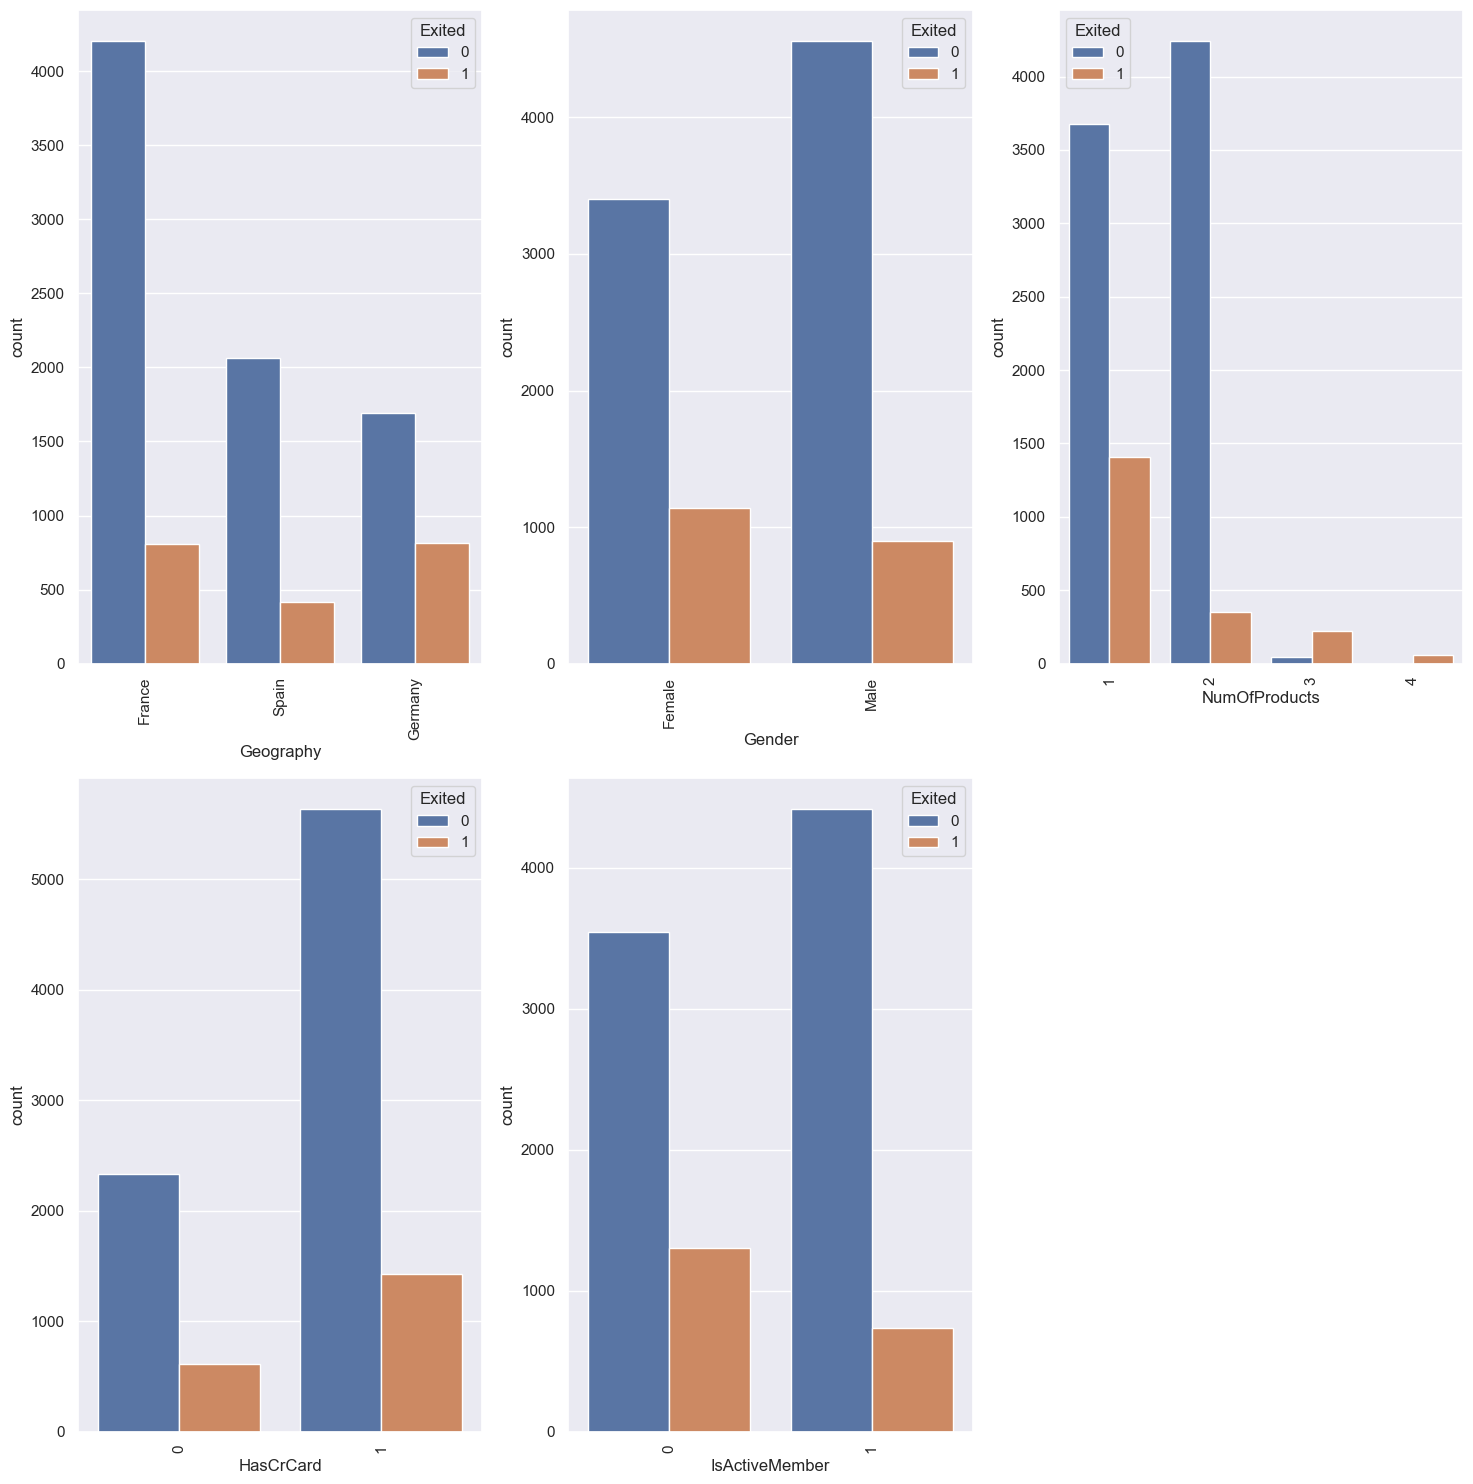

In [12]:
# List of categorical variables to plot

cat_vars=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,15))
axs=axs.flatten()

#Create barplot for each categorical variable

for i, var in enumerate(cat_vars):
    sns.countplot(x=var,hue='Exited',data=df,ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
#Adjusting space between subplots

fig.tight_layout()

#Delete sixth subplot

fig.delaxes(axs[5])

#Show Plot

plt.show()

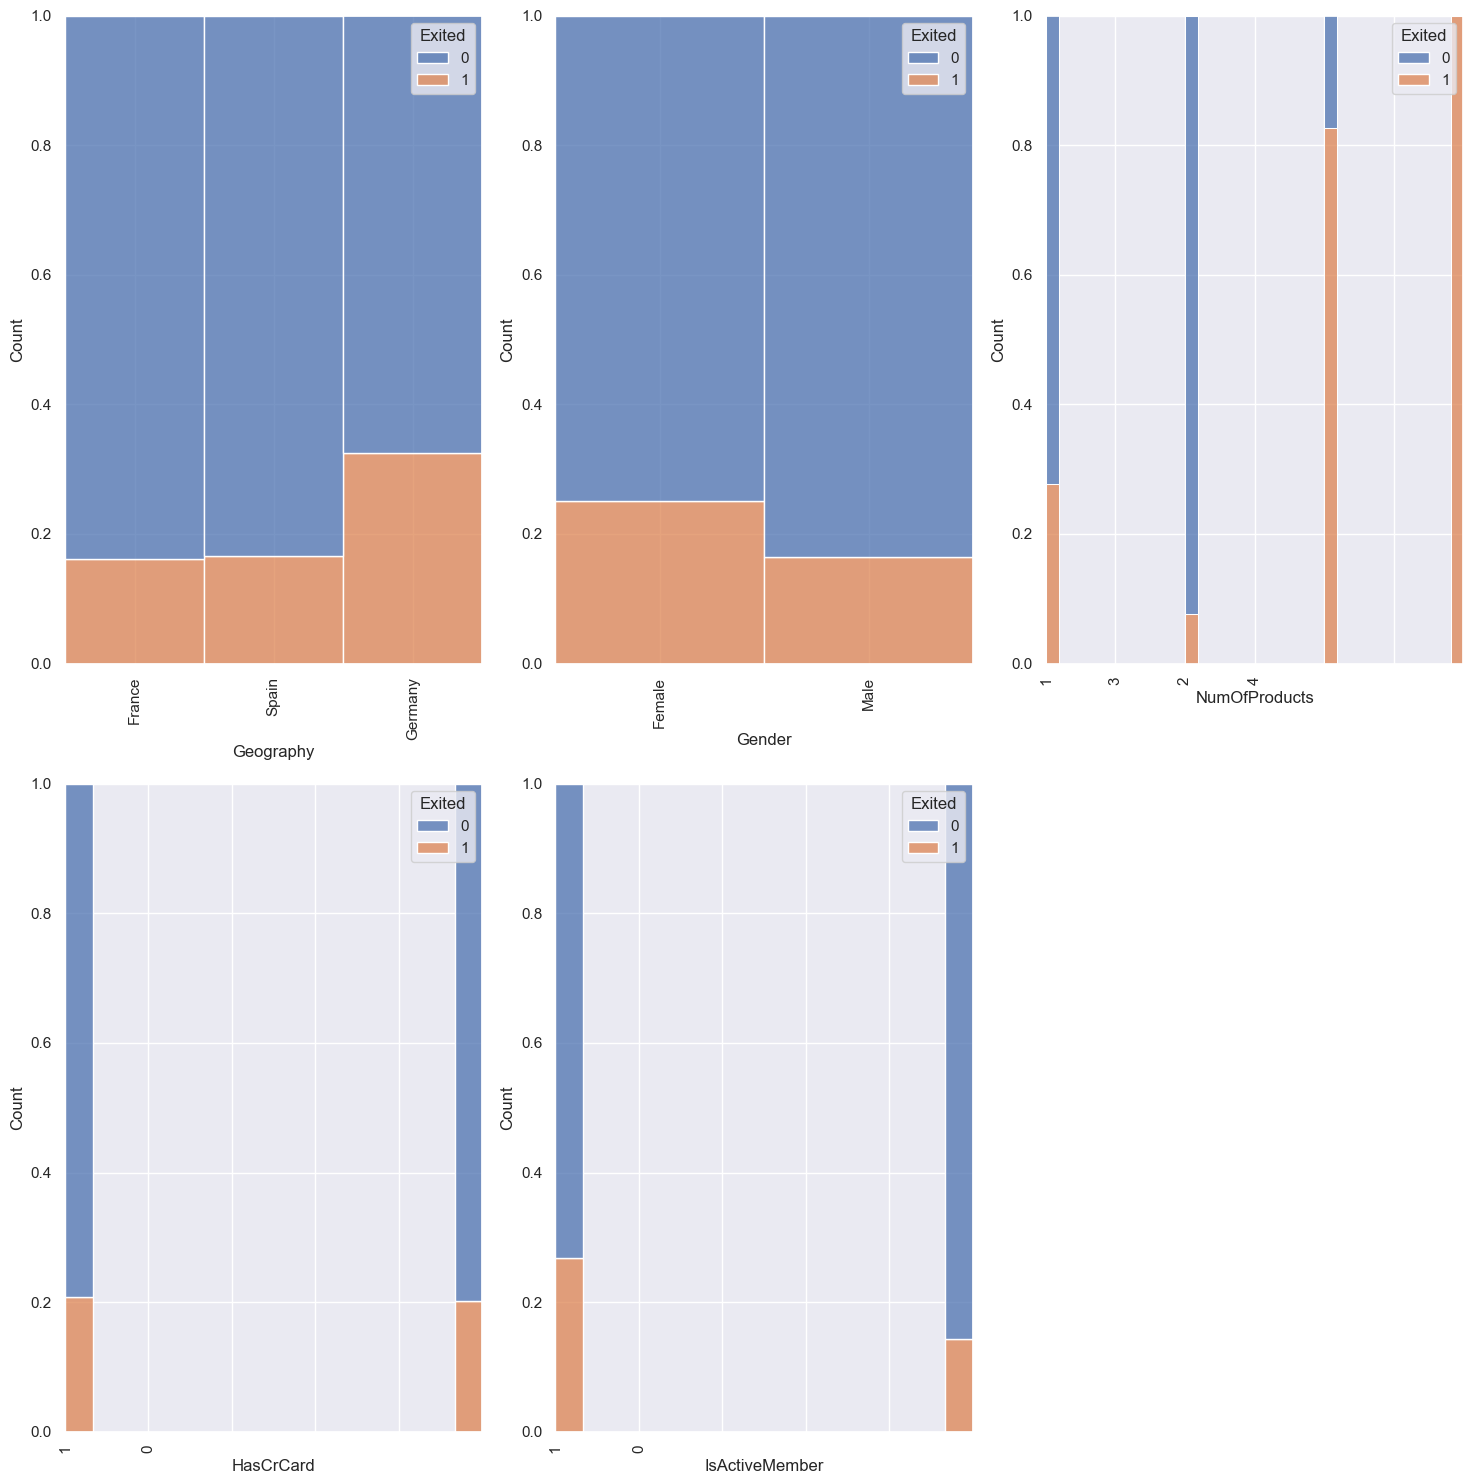

In [13]:
import warnings

warnings.filterwarnings('ignore')

# List of categorical variables to plot

cat_vars=['Geography','Gender','NumOfProducts','HasCrCard','IsActiveMember']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(15,15))
axs=axs.flatten()

#Create barplot for each categorical variable

for i, var in enumerate(cat_vars):
    sns.histplot(x=var,hue='Exited',data=df,ax=axs[i],multiple='fill',kde=False)
    axs[i].set_xticklabels(df[var].unique(),rotation=90)
    axs[i].set_xlabel(var)
#Adjusting space between subplots

fig.tight_layout()

#Delete sixth subplot

fig.delaxes(axs[5])

#Show Plot

plt.show()

In [14]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


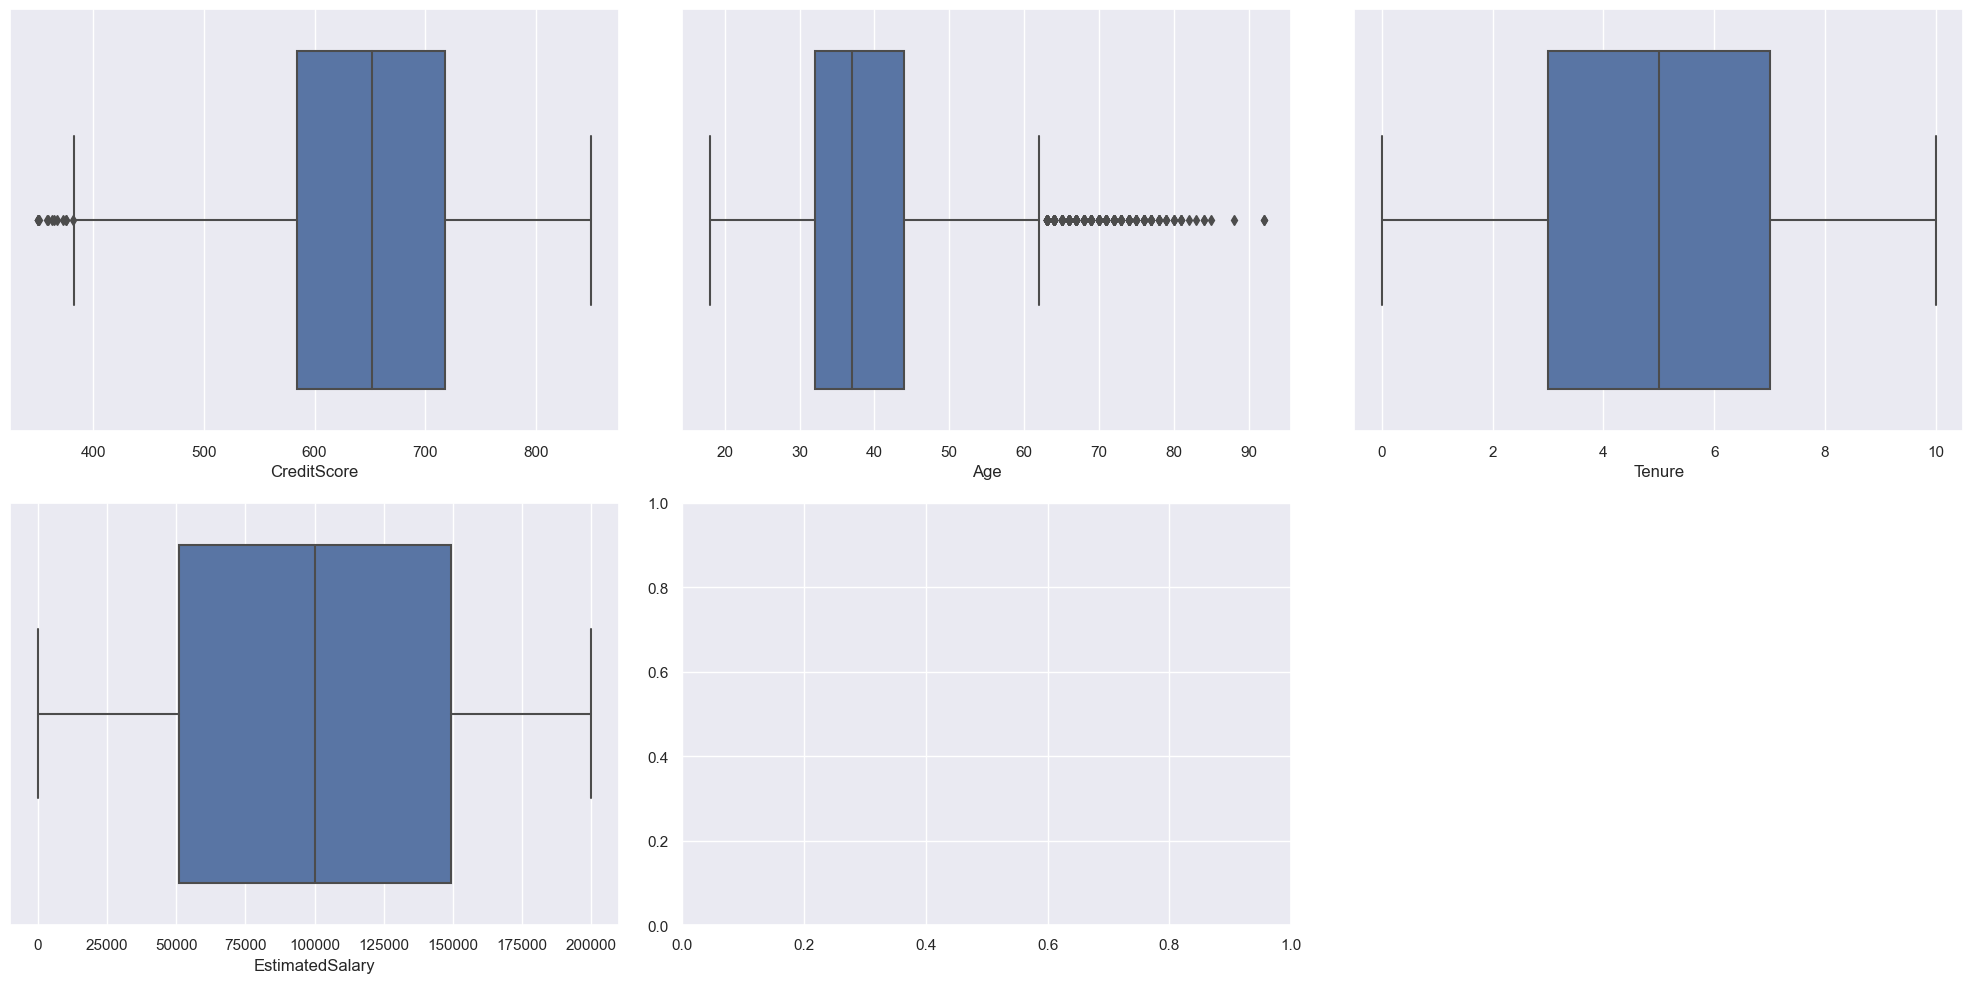

In [15]:
# List of numerical variables to plot

num_vars=['CreditScore','Age','Tenure','EstimatedSalary']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

#Create barplot for each categorical variable

for i, var in enumerate(num_vars):
    sns.boxplot(x=var,data=df,ax=axs[i])
    #axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
#Adjusting space between subplots

fig.tight_layout()

#Delete sixth subplot

fig.delaxes(axs[5])

#Show Plot

plt.show()

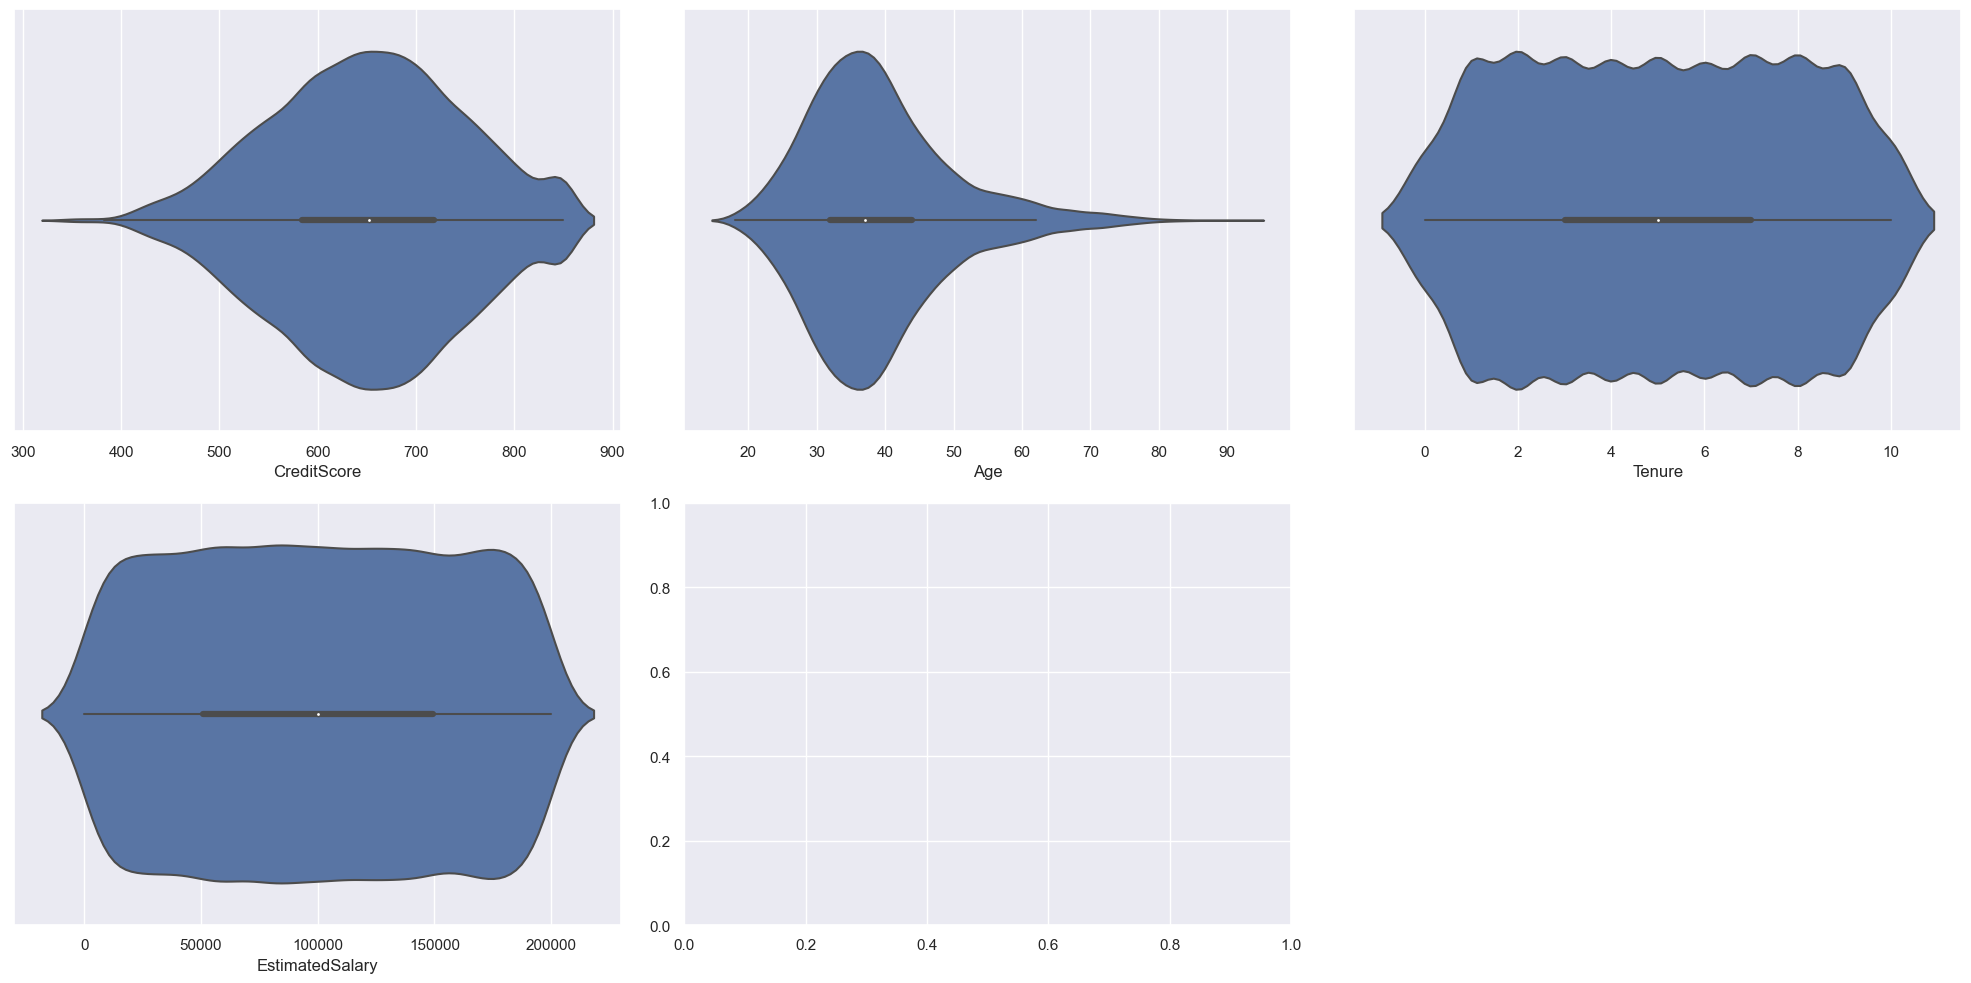

In [16]:
# List of numerical variables to plot

num_vars=['CreditScore','Age','Tenure','EstimatedSalary']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=3,figsize=(20,10))
axs=axs.flatten()

#Create barplot for each categorical variable

for i, var in enumerate(num_vars):
    sns.violinplot(x=var,data=df,ax=axs[i])
    #axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
#Adjusting space between subplots

fig.tight_layout()

#Delete sixth subplot

fig.delaxes(axs[5])

#Show Plot

plt.show()

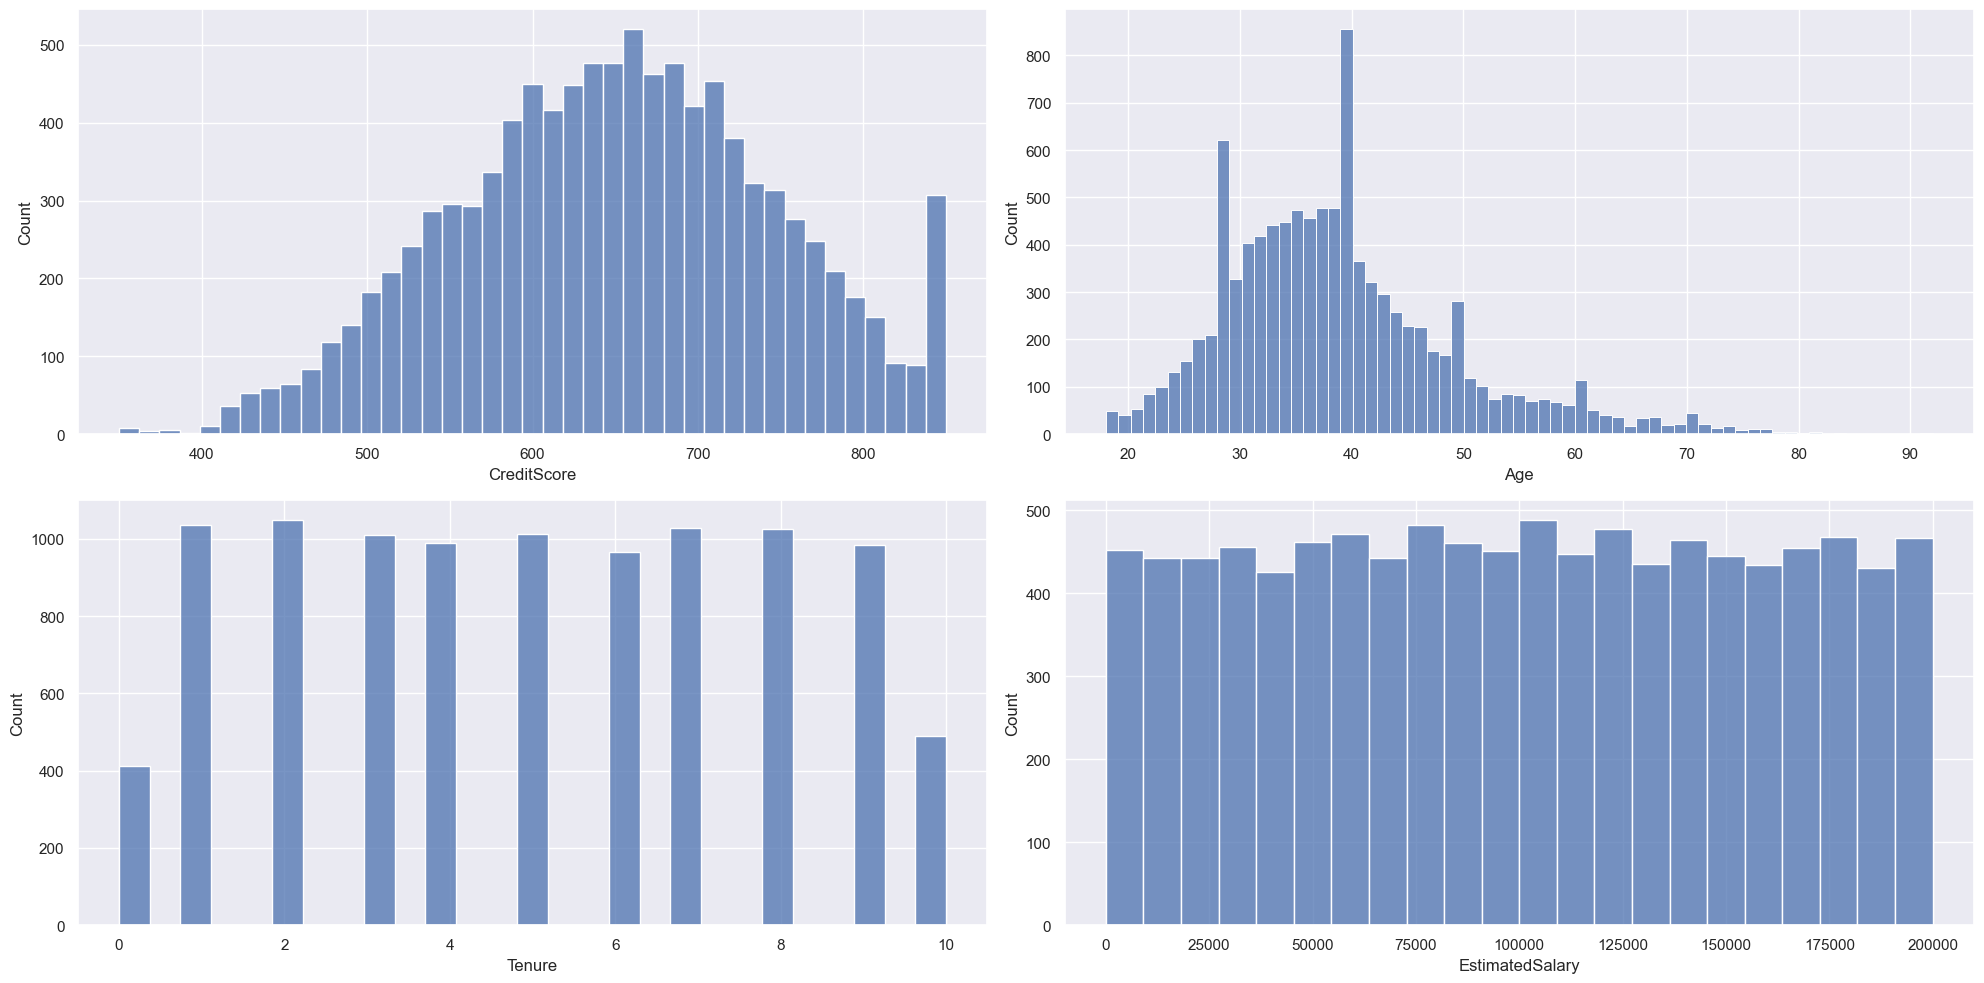

In [17]:
# List of numerical variables to plot

num_vars=['CreditScore','Age','Tenure','EstimatedSalary']

#Create figure with subplots

fig,axs=plt.subplots(nrows=2,ncols=2,figsize=(20,10))
axs=axs.flatten()

#Create barplot for each categorical variable

for i, var in enumerate(num_vars):
    sns.histplot(x=var,data=df,ax=axs[i])
    #axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)
#Adjusting space between subplots

fig.tight_layout()

#Delete sixth subplot

#fig.delaxes(axs[5])

#Show Plot

plt.show()

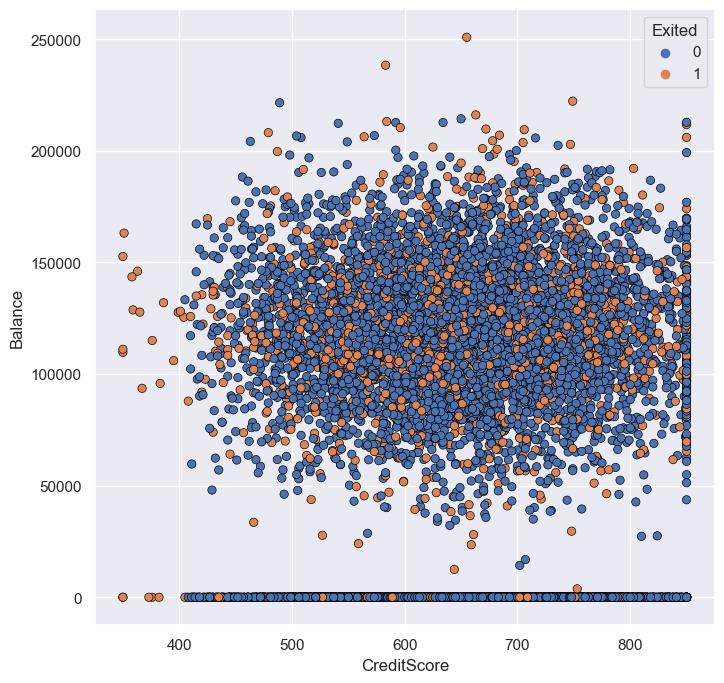

In [18]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x='CreditScore',y='Balance',hue='Exited',data=df,edgecolor='black')
plt.show()

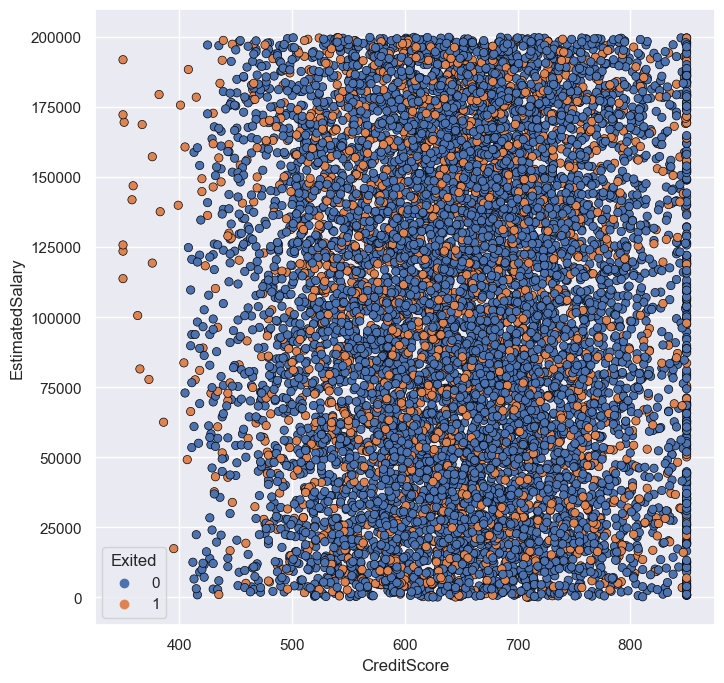

In [19]:
plt.figure(figsize=(8,8),dpi=100)
sns.scatterplot(x='CreditScore',y='EstimatedSalary',hue='Exited',data=df,edgecolor='black')
plt.show()

# Data Processing Part 2

In [20]:
#Checking for missing values
check_missing=df.isnull().sum()*100/df.shape[0]
check_missing[check_missing>0].sort_values(ascending=False)


Series([], dtype: float64)

In [21]:
check_missing

CustomerId         0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [22]:
df.head()

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [23]:
#Remove irrelevant columns like customer id
df.drop(columns='CustomerId',inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# One Hot Encoder for Object Datatype

In [24]:
#Loop over each column where data type is object

for col in df.select_dtypes(include=['object']).columns:
    
    #Print the column name and unique value
    print(f"{col}: {df[col].unique()}")

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


In [25]:
#Using Label Encoder
"""from sklearn import preprocessing

#Loop over each column where datatype is object

for col in df.select_dtypes(include=['object']).columns:
    
    #Initialize a label encoder object
    label_encoder=preprocessing.LabelEncoder()
    
    #Fit the encoder to the unique values of the colums
    label_encoder.fit(df[col].unique())
    #Transform the column using encoder
    df[col]=label_encoder.transform(df[col])
    
    #print the column name and unique labeled encoder
    
    print(f"{col}: {df[col].unique()}")"""

'from sklearn import preprocessing\n\n#Loop over each column where datatype is object\n\nfor col in df.select_dtypes(include=[\'object\']).columns:\n    \n    #Initialize a label encoder object\n    label_encoder=preprocessing.LabelEncoder()\n    \n    #Fit the encoder to the unique values of the colums\n    label_encoder.fit(df[col].unique())\n    #Transform the column using encoder\n    df[col]=label_encoder.transform(df[col])\n    \n    #print the column name and unique labeled encoder\n    \n    print(f"{col}: {df[col].unique()}")'

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Get the categorical columns in the dataframe
cat_cols = df.select_dtypes(include=['object']).columns

# Create a ColumnTransformer object with OneHotEncoder for the categorical columns
ct = ColumnTransformer([('ohe', OneHotEncoder(), cat_cols)])

# Fit the transformer on the dataframe and transform it into one-hot encoded features
onehot_features = ct.fit_transform(df)

# Get the feature names of the one-hot encoded features
feature_names = ct.named_transformers_['ohe'].get_feature_names_out(cat_cols)

# Create a dataframe from the one-hot encoded features
onehot_df = pd.DataFrame(onehot_features, columns=feature_names)

# Concatenate the original dataframe with the one-hot encoded features
df = pd.concat([df.drop(columns=cat_cols), onehot_df], axis=1)


In [27]:
onehot_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0
2,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0
9996,1.0,0.0,0.0,0.0,1.0
9997,1.0,0.0,0.0,1.0,0.0
9998,0.0,1.0,0.0,0.0,1.0


# Removing outliers

In [28]:
df.shape

(10000, 14)

In [29]:
from scipy import stats
#define a function to remove outliers using z-score for only selected numerical values

def remove_outliers(df,cols,threshold=3):
    #loop over each selecte item
    for col in cols:
        #calculate z-score for each data point in data in selected column
        z=np.abs(stats.zscore(df[col]))
        #remove rows with z-score greater than threshold in selecte column
        df=df[(z<threshold)|(df[col].isnull())]
    return df

In [30]:
selected_col=['Age']
df_clean=remove_outliers(df,selected_col)
df_clean.shape

(9867, 14)

# Co-Relation Heatmap

<AxesSubplot:>

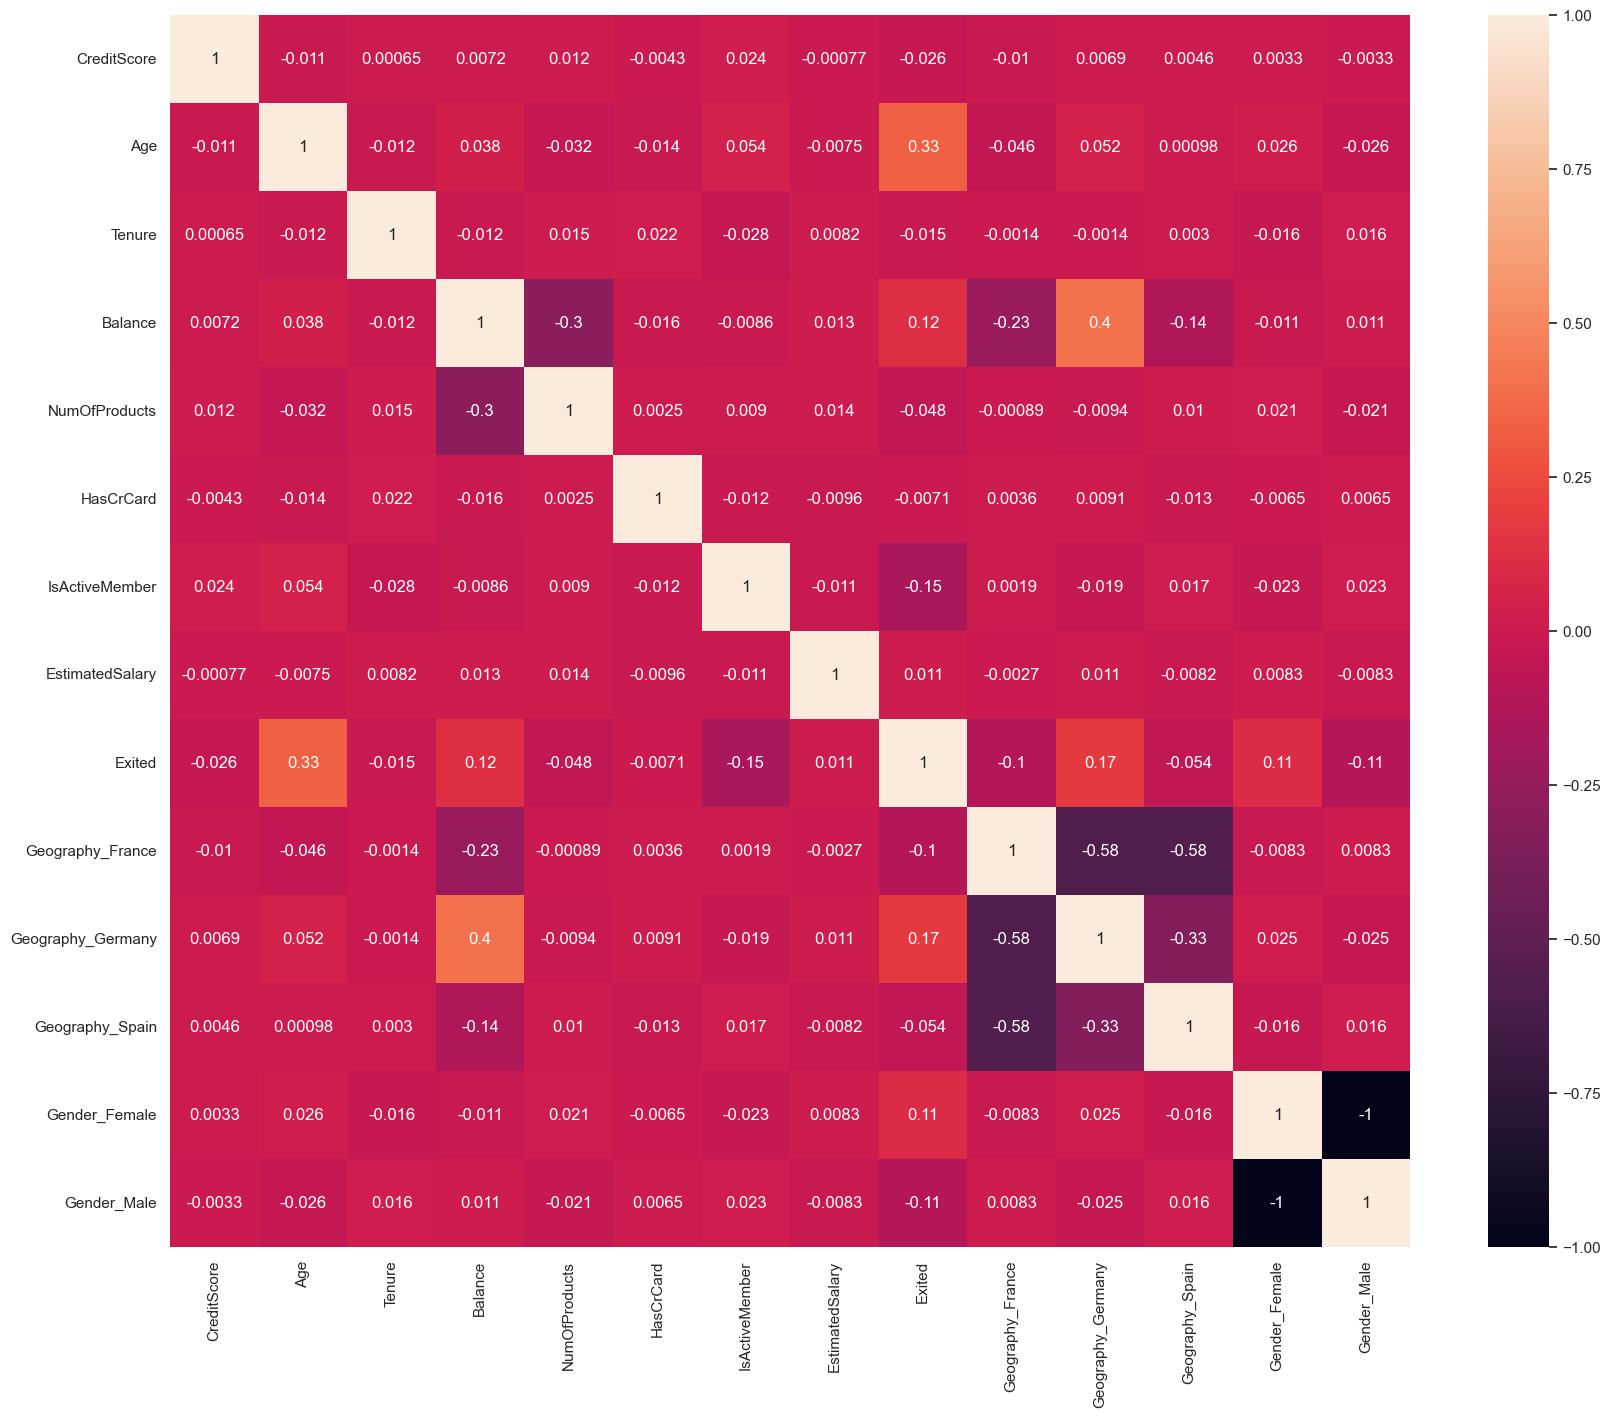

In [31]:
#Co-relation heatmap

plt.figure(figsize=(20,16))
sns.heatmap(df_clean.corr(),fmt='.2g',annot=True)

# Train Test Split Data

In [32]:
X=df_clean.drop('Exited',axis=1)
y=df_clean['Exited']

In [33]:
#Test size 20% and Train size 80%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=0)


# Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree=DecisionTreeClassifier(class_weight='balanced')
param_grid={
    'max_depth':[3,4,5,6,7,8],
    'min_samples_split':[2,3,4],
    'min_samples_leaf':[1,2,3,4],
    'random_state':[0,42]
    
}

#Perform a grid search with cross validation to find best hyperparameters
grid_search=GridSearchCV(dtree,param_grid,cv=5)
grid_search.fit(X_train,y_train)

#Print the best hyperparameters

print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 0}


In [35]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=4,min_samples_split=2)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=4, random_state=0)

In [36]:
y_pred=dtree.predict(X_test)
print("Accuracy Score:",round(accuracy_score(y_test,y_pred)*100,2),'%')

Accuracy Score: 84.19 %


In [37]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8419452887537994
Precision Score :  0.8419452887537994
Recall Score :  0.8419452887537994
Jaccard Score :  0.7270341207349081
Log Loss :  5.696869228675052


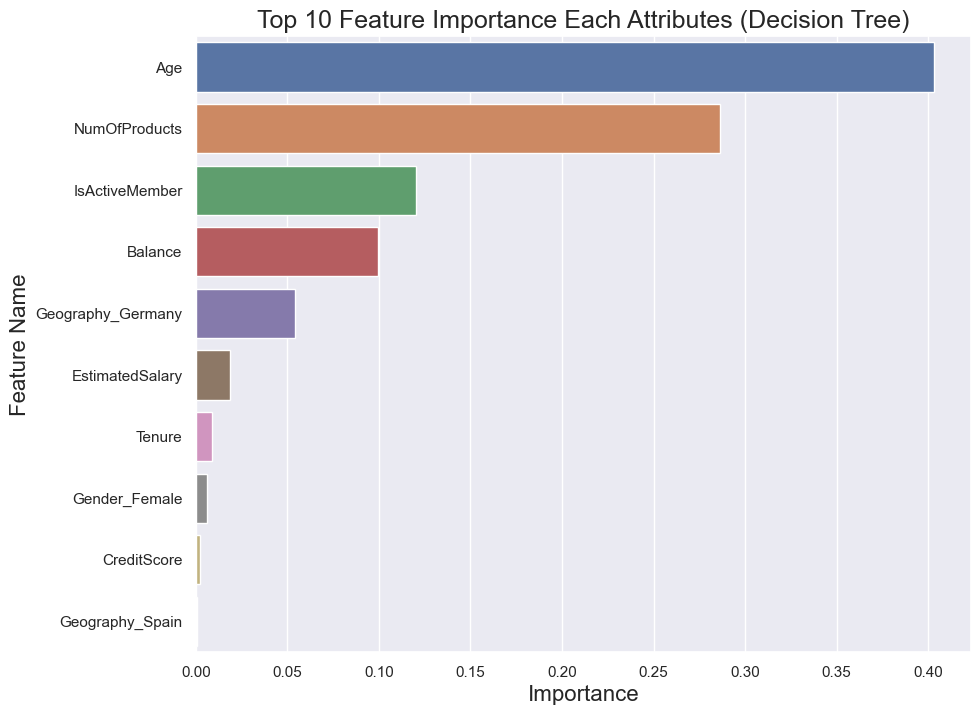

In [38]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

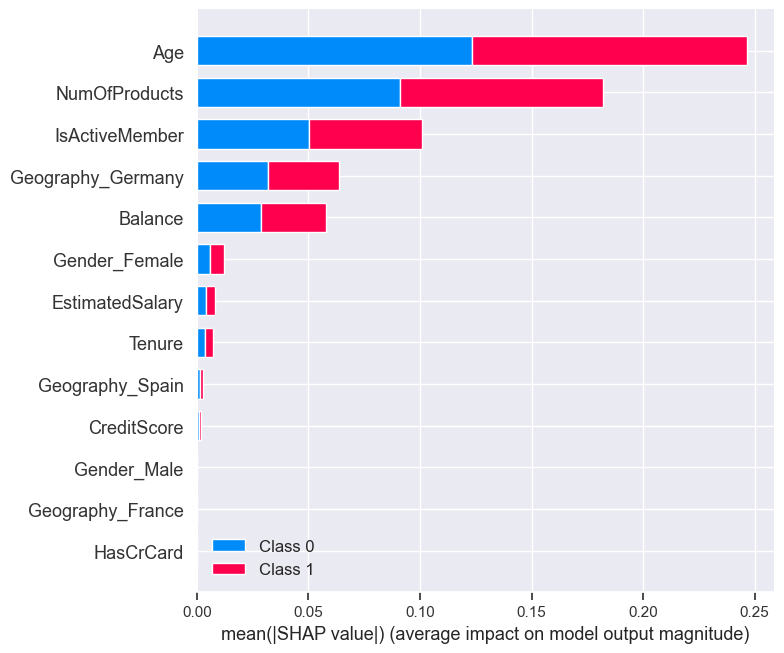

In [39]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

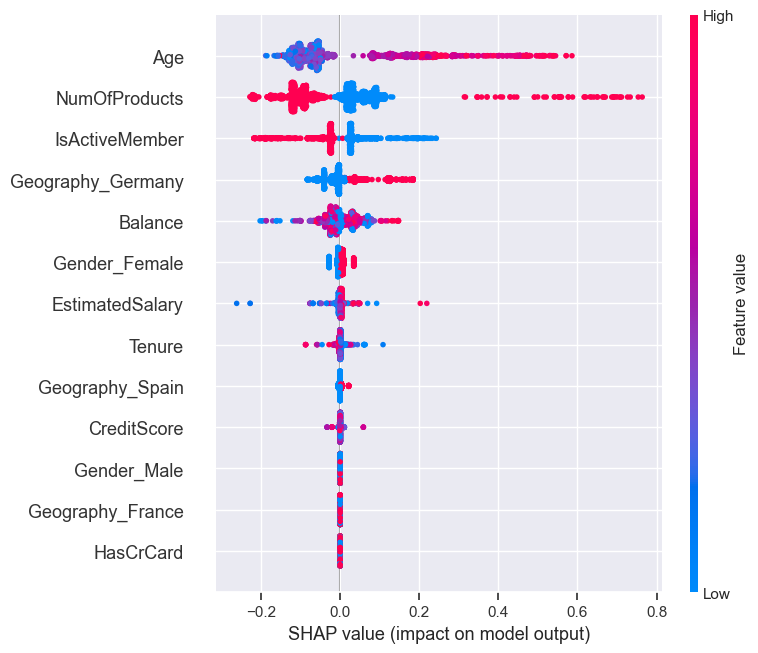

In [40]:
# compute SHAP values
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Decision Tree: 0.8419452887537994')

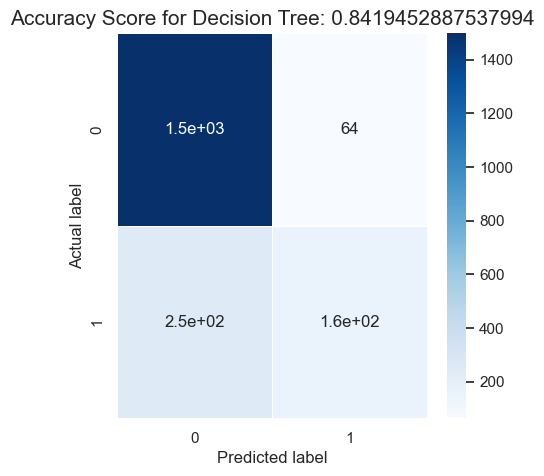

In [41]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Decision Tree: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

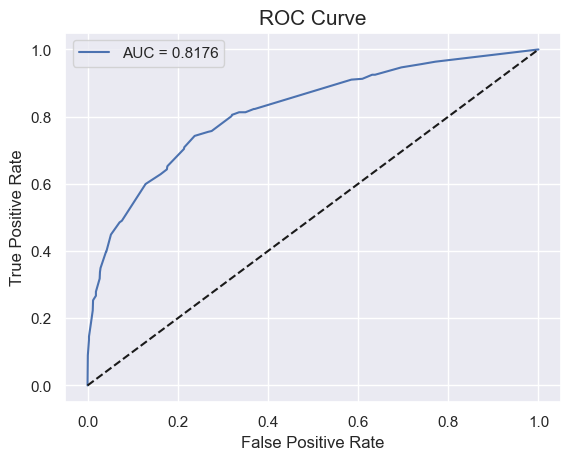

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = dtree.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()

# Random Forest

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 200}


In [45]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, max_features='sqrt', n_estimators=200, max_depth=10)
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, random_state=0)

In [46]:
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 85.31 %


In [47]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score, log_loss
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))
print('Log Loss : ',(log_loss(y_test, y_pred)))

F-1 Score :  0.8530901722391083
Precision Score :  0.8530901722391084
Recall Score :  0.8530901722391084
Jaccard Score :  0.7438162544169611
Log Loss :  5.295166911268478


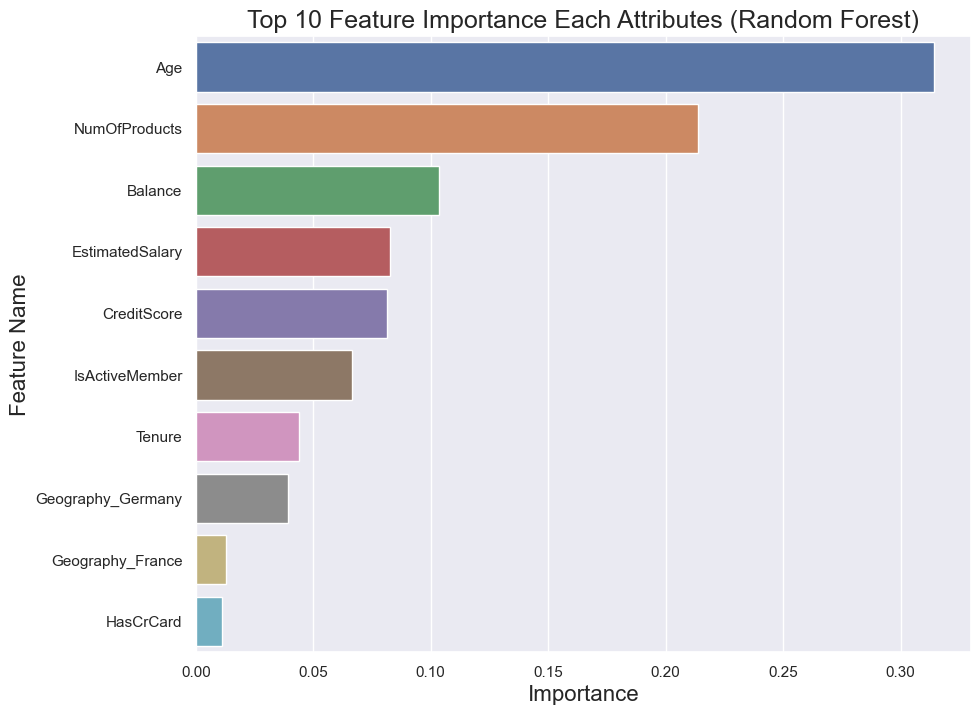

In [48]:
imp_df = pd.DataFrame({
    "Feature Name": X_train.columns,
    "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

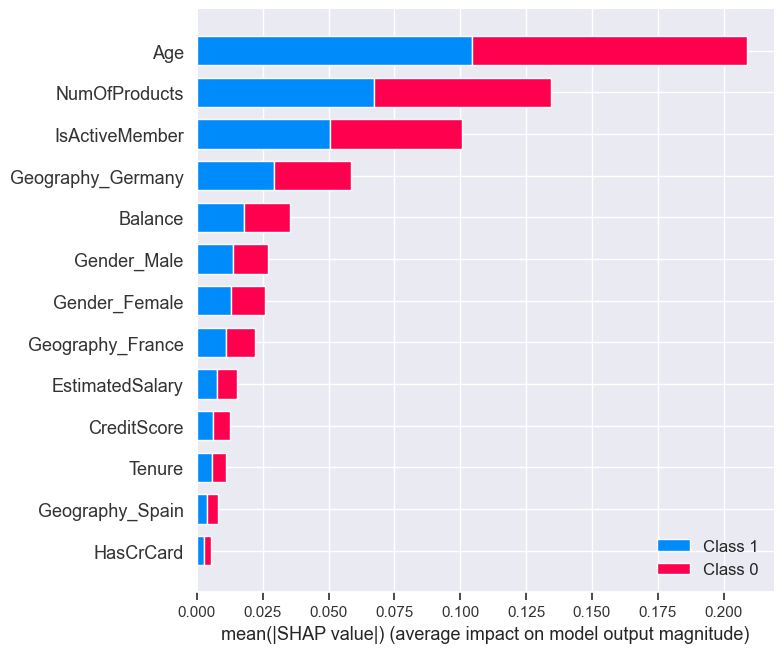

In [49]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

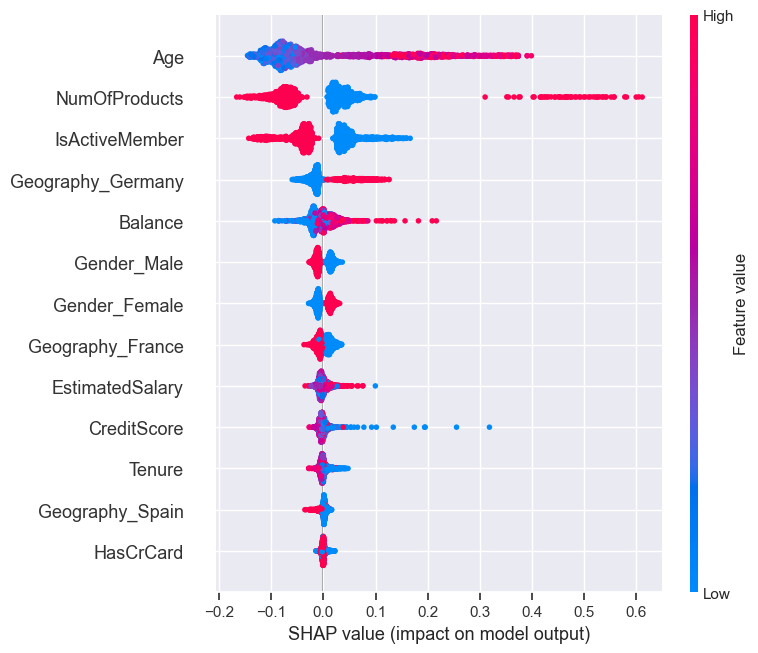

In [50]:
# compute SHAP values
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test.values, feature_names = X_test.columns)

Text(0.5, 1.0, 'Accuracy Score for Random Forest: 0.8530901722391084')

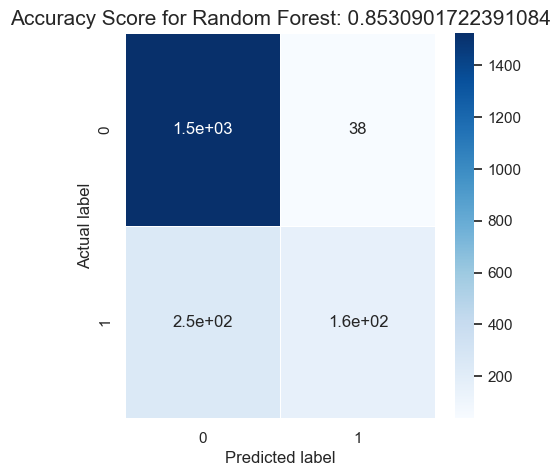

In [51]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score for Random Forest: {0}'.format(rfc.score(X_test, y_test))
plt.title(all_sample_title, size = 15)


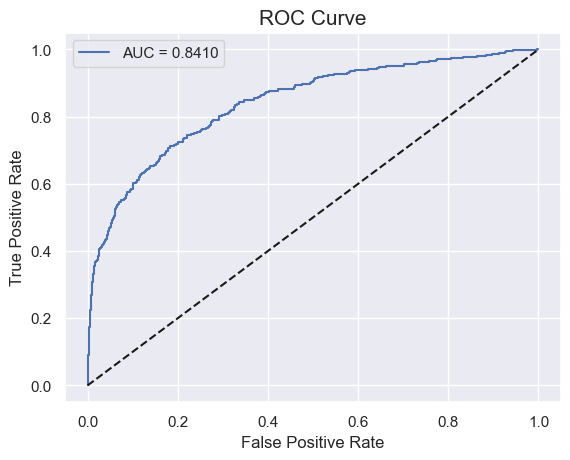

In [52]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_proba = rfc.predict_proba(X_test)[:][:,1]

df_actual_predicted = pd.concat([pd.DataFrame(np.array(y_test), columns=['y_actual']), pd.DataFrame(y_pred_proba, columns=['y_pred_proba'])], axis=1)
df_actual_predicted.index = y_test.index

fpr, tpr, tr = roc_curve(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])
auc = roc_auc_score(df_actual_predicted['y_actual'], df_actual_predicted['y_pred_proba'])

plt.plot(fpr, tpr, label='AUC = %0.4f' %auc)
plt.plot(fpr, fpr, linestyle = '--', color='k')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', size = 15)
plt.legend()